# 2024 Day 14

https://adventofcode.com/2024/day/14

https://adventofcode.com/2024/day/14/input

In [29]:
import re
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
test = """p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3"""
test_lines = test.split('\n')

In [20]:
test_size = Vec2(11, 7)

In [16]:
text = open("input-14.txt").read().strip()
lines = text.split('\n')

In [14]:
class Vec2:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return f'Vec2(x={self.x}, y={self.y})'
        
    def __add__(self, rhs):
        return self.__class__(self.x + rhs.x, self.y + rhs.y)
    
    def __sub__(self, rhs):
        return self.__class__(self.x - rhs.x, self.y - rhs.y)
    
    def __mul__(self, rhs):
        Self = self.__class__
        if isinstance(rhs, Self):
            return self.x * rhs.x + self.y * rhs.y
        else:
            return Self(self.x * rhs, self.y * rhs)
        
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __hash__(self):
        return hash((self.x, self.y))
        
    def __rmul__(self, lhs):
        Self = self.__class__
        if isinstance(lhs, Self):
            return self.x * lhs.x + self.y * lhs.y
        else:
            return Self(self.x * lhs, self.y * lhs)
    
    def is_int(self):
        return self.x % 1 < 1e-3 and self.y % 1 < 1e-3
    

In [4]:
regex = re.compile(r"p=(-?\d+),(-?\d+) v=(-?\d+),(-?\d+)")

In [12]:
def parse_line(line):
    px, py, vx, vy = regex.match(line).groups()
    return Vec2(int(px), int(py)), Vec2(int(vx), int(vy))

In [13]:
parse_line(test_lines[0])

(Vec2(x=0, y=4), Vec2(x=3, y=-3))

In [46]:
class Bot:
    def __init__(self, p, v, shape):
        self.p = p
        self.v = v
        self.shape = shape
        
    def loc(self, t):
        p = self.p
        v = self.v
        shape = self.shape
        x = (p.x + t*v.x) % shape.x
        y = (p.y + t*v.y) % shape.y
        return Vec2(x, y)
        
    @staticmethod
    def from_line(line, shape):
        p, v = parse_line(line)
        return Bot(p, v, shape)
        
class Board:
    def __init__(self, text, shape):
        self.lines = text.split('\n')
        self.bots = [Bot.from_line(line, shape) for line in self.lines]
        self.shape = shape
        self.mid = Vec2(shape.x//2, shape.y//2)
        
    def loc_counts(self, t):
        return Counter([bot.loc(t) for bot in self.bots])
    
    def quadrant_counts(self, t):
        counts = self.loc_counts(t)
        quadrants = {
            (horizontal, vertical): 0
            for horizontal in ('left', 'right')
            for vertical in ('top', 'bottom')
        }
        for (loc, num) in counts.items():
            if loc.x == self.mid.x or loc.y == self.mid.y:
                continue
            horizontal = 'left' if loc.x < self.mid.x else 'right'
            vertical = 'bottom' if loc.y > self.mid.y else 'top'
            quadrants[horizontal, vertical] += num
        return quadrants
                

## Part 1

In [47]:
b = Board(test, test_size)
b.bots

In [48]:
b.loc_counts(100)

Counter({Vec2(x=4, y=5): 2,
         Vec2(x=6, y=0): 2,
         Vec2(x=3, y=5): 1,
         Vec2(x=5, y=4): 1,
         Vec2(x=9, y=0): 1,
         Vec2(x=1, y=6): 1,
         Vec2(x=1, y=3): 1,
         Vec2(x=2, y=3): 1,
         Vec2(x=0, y=2): 1,
         Vec2(x=6, y=6): 1})

In [49]:
b.quadrant_counts(100)

{('left', 'top'): 1,
 ('left', 'bottom'): 4,
 ('right', 'top'): 3,
 ('right', 'bottom'): 1}

In [50]:
value = 1
for v in b.quadrant_counts(100).values():
    value *= v
value

12

In [54]:
b = Board(text, Vec2(101, 103))

In [55]:
value = 1
for v in b.quadrant_counts(100).values():
    value *= v
value

223020000

In [53]:
# 225120500 : too high

## Part 2

In [76]:
import hvplot.pandas
import holoviews as hv
import panel as pn

IntSlider(end=1000, name='t')

In [140]:
N = 485876

In [158]:
def make_plot(t):
    c = b.loc_counts(t)
    keys = list(c.keys())
    x = [key.x for key in keys]
    y = [key.y for key in keys]

    data = pd.DataFrame(dict(x=x, y=y))
    return data.hvplot.scatter(x='x', y='y', aspect='equal', width=500, height=500)

t = pn.widgets.IntSlider(
    name='t',
    value=N,
    start=0,
    end=8000,
)
plot = pn.bind(make_plot, t=t)

pn.Column(t, plot)

Column
    [0] IntSlider(end=8000, name='t', value=485876)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [143]:
N

485876

In [147]:
(15, 66), (45, 34)

((15, 66), (45, 34))

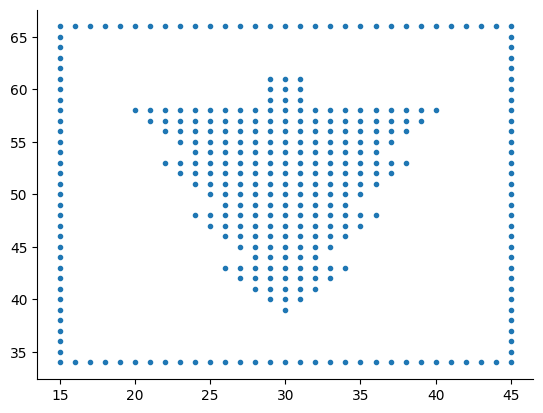

In [153]:
c = b.loc_counts(N)
search_locs = locs = set([loc for loc in c.keys() if 15 <= loc.x <= 45 and 34 <= loc.y <= 66])
x = [key.x for key in locs]
y = [key.y for key in locs]

fig, ax = plt.subplots()
data = pd.DataFrame(dict(x=x, y=y))
ax.plot(data.x, data.y, '.')

In [154]:
from tqdm import tqdm

In [155]:
for i in tqdm(range(N)):
    c = b.loc_counts(i)
    locs = set([loc for loc in c.keys() if 15 <= loc.x <= 45 and 34 <= loc.y <= 66])
    if locs == search_locs:
        break

  2%|█▎                                                                                  | 7338/485876 [00:01<02:08, 3715.05it/s]


In [156]:
i

7338

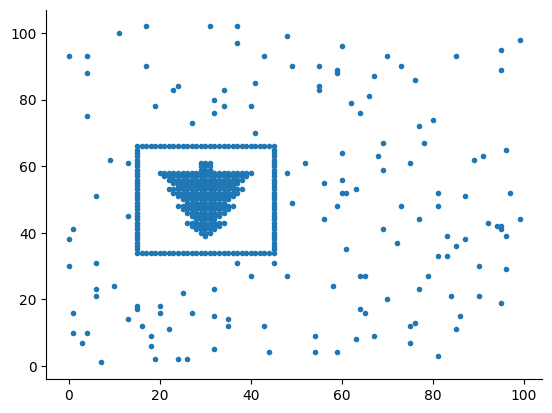

In [157]:
c = b.loc_counts(i)
keys = list(c.keys())
x = [key.x for key in keys]
y = [key.y for key in keys]

fig, ax = plt.subplots()
data = pd.DataFrame(dict(x=x, y=y))
ax.plot(data.x, data.y, '.')


In [122]:
v = 369, 437, 571, 672, 773, 874
v

(369, 437, 571, 672, 773, 874)

In [123]:
np.diff(v)

array([ 68, 134, 101, 101, 101])

In [125]:
[874 + n * 101 for n in range(10)]

[874, 975, 1076, 1177, 1278, 1379, 1480, 1581, 1682, 1783]

In [132]:
def make_plot(n):
    c = b.loc_counts(571 + 101 * n)
    keys = list(c.keys())
    x = [key.x for key in keys]
    y = [key.y for key in keys]

    data = pd.DataFrame(dict(x=x, y=y))
    return data.hvplot.scatter(x='x', y='y', aspect='equal', width=500, height=500)

n = pn.widgets.IntSlider(
    name='n',
    start=0,
    end=10000,
)
plot = pn.bind(make_plot, n=n)

pn.Column(n, plot)

Column
    [0] IntSlider(end=10000, name='n')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [116]:
np.diff(v)

array([ 68, 103,  31,  72,  29,  74,  27,  76,  25])

In [111]:
773 + 76 + 25

874

In [119]:
874 + 78 + 23 + 80 + 21 + 82 + 19 + 84 + 17 + 86 + 15 + 88 + 13 + 90 + 11 + 92 + 9 + 94 + 7 + 96 + 5 + 98 + 3 + 99 + 1 + 100

2185

In [121]:
2288 - 2185

103